In [10]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import datasets

In [11]:
choroba = datasets.load_diabetes()

dane = pd.DataFrame(choroba['data'], columns = choroba['feature_names'])
postep = pd.DataFrame(choroba['target'], columns = ["postep"])

diabetycy = pd.concat([dane, postep], axis=1)

In [15]:
k_neigh = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance', p=1)

postep=diabetycy["postep"]
parametry=diabetycy.loc[:,["bmi","bp","s4","s5"]].values
X_u,X_t,Y_u,Y_t=train_test_split(parametry,postep, test_size=.3)
cv = 10 
wszystkie=[]
for n in range(cv):
    X_1,X_2,Y_1,Y_2=train_test_split(X_u,Y_u,test_size=.2, shuffle=True)
    k_neigh.fit(X_1,Y_1)
    wynik=k_neigh.predict(X_2)
    print(metrics.r2_score(wynik,Y_2))
    wszystkie.append(metrics.r2_score(wynik,Y_2))
print("Średnia %s" % str(np.mean(wszystkie)))

-0.6450944768077163
-0.44567704885362525
-0.28606590428050693
-1.3421617602524072
-0.5608986752556562
-0.5504191867450949
-0.47587327498468746
-0.40142753916087637
-0.8815338347494668
-0.07545352843147568
Średnia -0.5664605229521513


In [18]:
k_neigh = neighbors.KNeighborsRegressor(n_neighbors=30, weights='uniform', p=2)
scores = cross_validate(k_neigh,X_u, Y_u, cv=10)['test_score']
print(scores)
print(np.mean(scores))

[0.51534119 0.34467958 0.44360376 0.42500198 0.40463715 0.19616208
 0.41900879 0.46374178 0.43856649 0.46219552]
0.4112938313093255


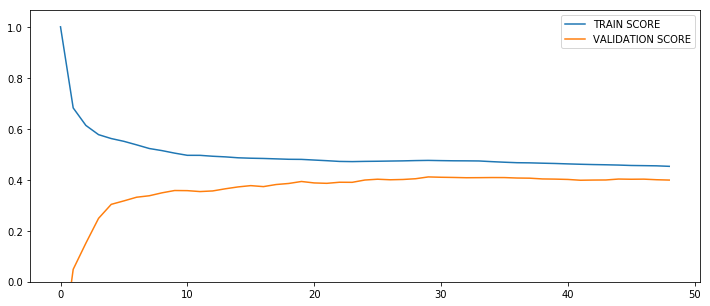

In [19]:
uczace = []
testowe = []
for n in range(1,50):
    k_neigh = neighbors.KNeighborsRegressor(n_neighbors=n, weights='uniform', p=2) 
    scores = cross_validate(k_neigh,X_u, Y_u, cv=10,return_train_score=True)
    train_score = scores['train_score']
    test_score=scores['test_score']
    uczace.append(np.mean(train_score))
    testowe.append(np.mean(test_score))
plt.figure(figsize = (12,5))
plt.plot(np.arange(len(uczace)),uczace, label = "TRAIN SCORE")
plt.plot(np.arange(len(uczace)),testowe, label = "VALIDATION SCORE")
plt.ylim(0)
plt.legend()

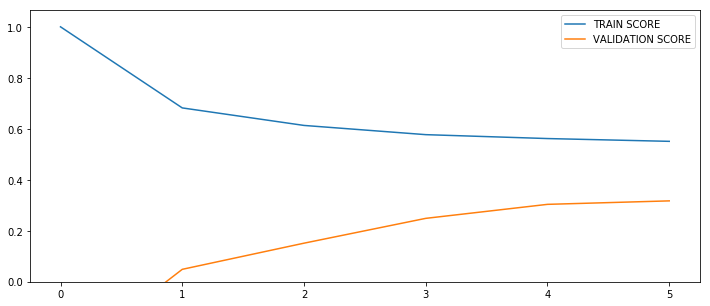

In [20]:
uczace = []
testowe = []
for p in range(1,7):
    k_neigh = neighbors.KNeighborsRegressor(n_neighbors=p, weights='uniform', p=2)
    scores = cross_validate(k_neigh,X_u, Y_u, cv=10,return_train_score=True)
    train_score=scores['train_score']
    test_score=scores['test_score']
    uczace.append(np.mean(train_score))
    testowe.append(np.mean(test_score))
plt.figure(figsize = (12,5))
plt.plot(np.arange(len(uczace)),uczace, label = "TRAIN SCORE")
plt.plot(np.arange(len(uczace)),testowe, label = "VALIDATION SCORE")
plt.ylim(0)
plt.legend()